In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction & Research Questions

    The following analysis covers the dataset "No-Show Appointments" from Kaggle comprising patient data from Brazil. 

In [103]:
data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [104]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


    The variables, that I will cover in this analysis are:
    
     1) "No-show" - indicates, whether patient showed up to the appointment ("No"- means patient showed up);
     2) "SMS" - indicaties, whether the patient received sms-reminder about the appointment;
     3) "Neighbourhood"- indicates the neighbourhood of each patient;
     4) Scholarship - indicates, whether the patient is enrolled in the Brasilian welfare program.
     
     These variables are the most relevant for the question, why some patients do not show up to their appointments. 
     

    In this context I purpose three hypotheses for the above dataset:
        
        1) Patients receiving sms show up more often than those that do not receive sms;
        
        2) Patiens living in particular neighbourhoods do not show up more frequently;
        
        3) Show up variable and Scholarship variable are correlated: patients enrolled in welfare program behave 
           differently than patiens not enrolled in welfare program.
    

## Examining the Data Sturcture

### Missing Values

    Below I examine the whole dataset in order to see whether it contains any missing values.

    In the summaries presented above we can already see that the columns probably do not contain any missing values as the 
    observation count remains the same all over the data set. In addition I use the following function to check 
    the dataset for missing values.

In [106]:
def getPctMissing(series):
    num = series.isnull().sum()
    den = series.count()
    return 100*(num/den)

In [107]:
print getPctMissing(data)

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64


    Result: dataset contains no missing values

### Examining each variable in the dataset for irrgularities

In [108]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


    The table shows that there is something wrong with the variable "Age". Age cannot be negative.
    Below I proceed with the examination of the variable "Age". 

In [109]:
data.loc[data.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [110]:
data.loc[data.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


    There seem to be 7 Females over the age of 100. Seems not that unlikely. There is however one 
    very unlikely observation, where age is negative.

    Dropping the one unlikely obeservation:

In [111]:
data = data.drop([99832])

In [112]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [113]:
data.loc[data.Handcap > 2] #checking for irregularities in Handicap variable

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2214,2.754718e+12,5640760,M,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,No
22014,2.754718e+12,5675367,M,2016-05-09T13:37:54Z,2016-05-09T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,No
28840,6.656653e+13,5586010,M,2016-04-15T07:12:28Z,2016-05-03T00:00:00Z,15,ROMÃO,0,0,0,0,3,1,Yes
28892,6.656653e+13,5652894,M,2016-05-03T10:48:26Z,2016-05-04T00:00:00Z,15,ROMÃO,0,0,0,0,3,0,No
44686,2.579378e+14,5751751,M,2016-05-31T10:35:08Z,2016-05-31T00:00:00Z,76,INHANGUETÁ,0,1,0,0,3,0,Yes
69683,5.229634e+14,5684755,F,2016-05-11T09:05:23Z,2016-05-11T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,0,No
69781,5.229634e+14,5651451,F,2016-05-03T08:50:52Z,2016-05-03T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,0,No
71457,5.229634e+14,5652195,F,2016-05-03T09:48:10Z,2016-05-06T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,1,No
78644,3.616644e+13,5608507,M,2016-04-20T13:56:51Z,2016-05-05T00:00:00Z,7,BONFIM,0,0,0,0,3,1,No
81320,3.616644e+13,5658796,M,2016-05-04T11:56:58Z,2016-05-20T00:00:00Z,7,BONFIM,0,0,0,0,3,0,Yes


    Below I adjust the date format of the dataset:

In [114]:
data.ScheduledDay = data.ScheduledDay.apply(np.datetime64)

In [115]:
data.ScheduledDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [116]:
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)

In [117]:
data.AppointmentDay.head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [118]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 2. Evaluation of the Dataset

## Patient show up conditional on receiving sms (1. Hypothesis)

    In order to test, whether patients receiving sms showed up more frequently, I split patient data into two groups:
    
    1. Group: patients not receiving sms (nosms_data)
    2. Group: patient receiving sms (sms_data)

In [119]:
nosms_data = data[(data.SMS_received <= 0)] #patients do not received sms

In [120]:
nosms_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.504400e+04,7.504400e+04,75044.000000,75044.000000,75044.000000,75044.000000,75044.000000,75044.000000,75044.0
mean,1.492089e+14,5.687884e+06,36.888465,0.098022,0.198963,0.074450,0.033487,0.024932,0.0
std,2.580611e+14,6.258771e+04,23.467132,0.297347,0.399223,0.262503,0.179906,0.170767,0.0
min,3.921784e+04,5.134227e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.238916e+12,5.654806e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.214607e+13,5.687834e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.462148e+13,5.733525e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.0


In [121]:
noshow = np.array(nosms_data["No-show"]) # I create a NumPy array out of the nosms-dataset

In [122]:
print noshow.max()
print noshow.min()

Yes
No


In [123]:
sms_data = data[(data.SMS_received > 0)] #patients received sms 

In [124]:
sms_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,3.548200e+04,3.548200e+04,35482.000000,35482.000000,35482.000000,35482.000000,35482.000000,35482.000000,35482.0
mean,1.438652e+14,5.648697e+06,37.513810,0.098782,0.193619,0.066400,0.023871,0.016572,1.0
std,2.518491e+14,8.066133e+04,22.330332,0.298374,0.395140,0.248983,0.152650,0.139882,0.0
min,5.376153e+05,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.932647e+12,5.605518e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.982433e+13,5.648944e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.358590e+13,5.716710e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,9.999320e+14,5.773092e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.0


In [125]:
noshow2 = np.array(sms_data["No-show"]) # I create a NumPy array out of the sms_data; patient received sms

In [126]:
print noshow2.max()
print noshow2.min()

Yes
No


    The following graph shows the group of patients receiving sms. "Yes" means patients did not show up. 

Text(0,0.5,u'Number of patients')

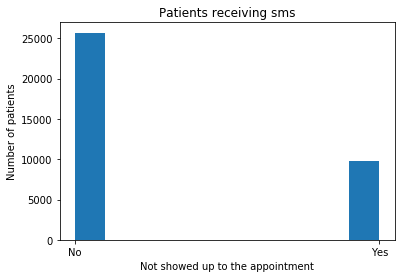

In [127]:
plt.hist(noshow2) 
plt.title("Patients receiving sms")
plt.xlabel("Not showed up to the appointment")
plt.ylabel ("Number of patients")


    The following graph shows patient group that not received sms. "Yes" means patients did not show up.

Text(0,0.5,u'Number of patients')

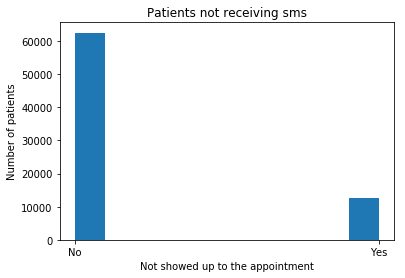

In [128]:
plt.hist(noshow)
plt.title("Patients not receiving sms")
plt.xlabel("Not showed up to the appointment")
plt.ylabel ("Number of patients")

    The above histograms do not show large differences between both groups. Below I will try to quantify those reults.

    The size of each group:

In [129]:
np.count_nonzero(noshow) # patients with no sms

75044

In [130]:
np.count_nonzero(noshow2) #patients with sms

35482

### Noshow - Patiens not receiving sms

In [131]:
noshow_series = pd.Series(noshow)#creating Pandas Series out of NumPy array

In [132]:
noshow_dummies = pd.get_dummies(noshow_series) #making the No-show variabke a dummy variable

    ‘No’ if patient showed up to their appointment 

In [133]:
noshow_dummies.head(15)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [134]:
noshow_dummies.groupby('Yes').count()

,No
Yes,
0,62509
1,12535


    This result means that out of the 75044 patients within this group, 12535 did not show up for the appointment.

### Noshow2 - patients receiving sms

In [135]:
noshow_series2 = pd.Series(noshow2) # the procedure is similar to the above with noshow data

In [136]:
noshow_dummies2 = pd.get_dummies(noshow_series2)

In [137]:
noshow_dummies2.head(15)

,No,Yes
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1


In [138]:
noshow_dummies2.groupby('Yes').count()

,No
Yes,
0,25698
1,9784


    The result shows, that out of the 35482 patients in this group, 9784 did not show up to the appointment.

    In order to compare both groups "noshow" and "noshow2" I calculated the percentage of patient that did showed up.
    
        In the group nowshow2, that received sms 72,4% showed up to the appointment. 
        
        In the group noshow, that did not received sms: 83,3% showed up.

    This result suggests, that the sms variable alone is no explanation for frequency of showing up to the appointment.

## Patient showup conditional on neighbourhood  (2. Hypothesis)

    In the below analysis I test the second assumption that there are differences in various neighbourhoods with regard 
        to the show up variable 

In [139]:
neighbour = data[['Neighbourhood','No-show']]

In [140]:
neighbour.head() #checking the dataset

,Neighbourhood,No-show
0,JARDIM DA PENHA,No
1,JARDIM DA PENHA,No
2,MATA DA PRAIA,No
3,PONTAL DE CAMBURI,No
4,JARDIM DA PENHA,No


In [141]:
dummy = pd.get_dummies(neighbour['No-show']) #getting dummies/turning No-show variable into numerical one

In [142]:
dummy_neighbour = pd.concat([neighbour, dummy], axis = 1) #creating dataset with the dummies

In [143]:
dummy_neighbour.head() #checking the dataset

,Neighbourhood,No-show,No,Yes
0,JARDIM DA PENHA,No,1,0
1,JARDIM DA PENHA,No,1,0
2,MATA DA PRAIA,No,1,0
3,PONTAL DE CAMBURI,No,1,0
4,JARDIM DA PENHA,No,1,0


### Showing up

    Creating a dataset of patients ("no") that showed up at the appointments grouped by neighbourhood:

In [144]:
showup_plus = dummy_neighbour[["Neighbourhood", "No"]]

neighbourhood_group = showup_plus.groupby(['Neighbourhood'])

total_results = neighbourhood_group.sum()

no = total_results.sort_values('No')



### Not showing up

    Creating a dataset of patients("yes") that did not show up at the appointments grouped by neighbourhood:

In [145]:
showup_no = dummy_neighbour[["Neighbourhood", "Yes"]]

neighbourhood_noshowup = showup_no.groupby(['Neighbourhood'])

total_results2 = neighbourhood_noshowup.sum()

yes = total_results2.sort_values('Yes')

In [146]:
no.head()

,No
Neighbourhood,
ILHAS OCEÂNICAS DE TRINDADE,0.0
PARQUE INDUSTRIAL,1.0
AEROPORTO,7.0
ILHA DO FRADE,8.0
ILHA DO BOI,32.0


In [147]:
yes.head()

,Yes
Neighbourhood,
PARQUE INDUSTRIAL,0.0
AEROPORTO,1.0
ILHA DO FRADE,2.0
ILHAS OCEÂNICAS DE TRINDADE,2.0
ILHA DO BOI,3.0


In [148]:
result = pd.concat([yes, no], axis=1)

In [149]:
result.head() # here we have the count of patients by neighbourhood that did and did not show up to the appointments

,Yes,No
AEROPORTO,1.0,7.0
ANDORINHAS,521.0,1741.0
ANTÔNIO HONÓRIO,50.0,221.0
ARIOVALDO FAVALESSA,62.0,220.0
BARRO VERMELHO,91.0,332.0


    The below graph shows patients show up by neighbourhood divided in groups "yes" and "no". We see that both lines follow 
    each other very closely and without any outliers. This suggests, that the relation between neighbourhood and 
    showing up to the appointment is not very strong (if any).
    
    *Reminder: "yes" means that patient did not show up in this context

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0,u'Neighbourhoods')

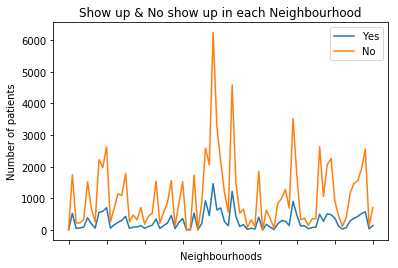

In [150]:
%pylab inline
import seaborn as sns
result.plot(title='Show up & No show up in each Neighbourhood')
plt.ylabel('Number of patients')
plt.xlabel("Neighbourhoods")

## Patient show up conditional on scholarship  (3. Hypothesis)

In [151]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [152]:
scholar = data[['Scholarship','No-show']]

In [153]:
scholar.head(15)

,Scholarship,No-show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No
5,0,No
6,0,Yes
7,0,Yes
8,0,No
9,0,No


In [154]:
scholar.describe()

,Scholarship
count,110526.000000
mean,0.098266
std,0.297676
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


    Below the approach is simmilar to the transformations already done in the chapter verifying the first hypothesis.

In [155]:
dummy_scholar = pd.get_dummies(scholar['No-show']) #transforming scholarship variable into a dummy variable

In [156]:
dummy_scholar.head(15)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [157]:
dummy_scholar_concat = pd.concat([scholar, dummy_scholar], axis = 1)#combining the tables in order to get a dataset

In [158]:
dummy_scholar_concat.head(15)

,Scholarship,No-show,No,Yes
0,0,No,1,0
1,0,No,1,0
2,0,No,1,0
3,0,No,1,0
4,0,No,1,0
5,0,No,1,0
6,0,Yes,0,1
7,0,Yes,0,1
8,0,No,1,0
9,0,No,1,0


In [159]:
scholar_clean = dummy_scholar_concat[['Scholarship','No',"Yes"]]#creating a dataset containing only dummies


In [160]:
scholar_clean.head(15)

,Scholarship,No,Yes
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0


In [161]:
scholar_clean2 =scholar_clean.groupby(["Scholarship"]) #grouping the dataset by scholarship variable

In [162]:
scholar_results = scholar_clean2.sum()

In [163]:
scholar_results.head()

,No,Yes
Scholarship,,
0,79924.0,19741.0
1,8283.0,2578.0


    The graph below displays patients show up conditional on scholarship variable. The group, where
    scholarship = 0 receives is not enroled in the welfare program. 
    The group, where scholarship = 1 is enrolled in the welfare program. 
    "No" means, that patient showed up to the appointment. 

Text(0,0.5,u'Number of patients')

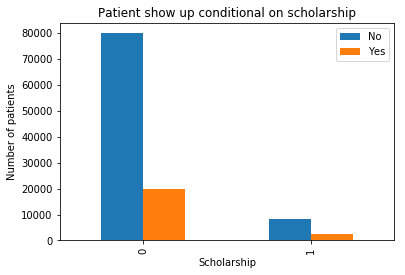

In [164]:
scholar_results.sort_values("Yes")
scholar_results.plot(kind="bar", title="Patient show up conditional on scholarship")
plt.ylabel("Number of patients")

    The above graph suggests, that patients enrolled in the welfare program (Scholarship = 1) do
    have slightly less often show up rate to the appointments. 
    
    We see that the relation between "Yes" and "No" within the group with Scholarship
    is smaller than the relation within the group without Scholarship.
    
    I additionaly verify whether the percentages of each group confirm those relation:
    
    Out of the group with no scholarship: 20% did not show up
    Out of the group with scholarship: 24% did not show up
    
    All in all the difference between those groups is 4%. 
    

# 3. Conclusions

    In the first chapter of this analysis I purposed three hypotheses with regard to the dataset:
    
    1) Patients receiving sms show up more often than those that do not receive sms;
    2) Patiens living in particular neighbourhoods do not show up more frequently;
    3) Patients enrolled in welfare program behave differently than patiens not enrolled in welfare program.
    
    Hypotheses 1 & 2 do not find confirmation in the data. My rudimentary analysis did not confirm
    that there is correlation between Show-up variable and Sms variable. 
    
    The 3. hypothesis finds weak confirmation. The group enrolled in the welfare program did not show up 4%
    more often than the group not enrolled in the welfare program.
    
    More evidence is needed in order to provide definitive results. Next I would perform some 
    basic difference-in-differences regressions to see whether the results from this analysis hold. 
  